Name: John Herrick \
Course: DSC540 \
Date: 1/30/2023

# Term Project: Milestone 3

For the third milestone of my term project I am to collect my data from my website source and perform at least five meaningful transformations to it. These transformations are to prepare my data for my final analysis so they should be geared towards data cleaning, preparation, and preliminary analysis and discovery. I will begin by reading my data into a dataframe.

In [33]:
# Importing likley useful modules

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [34]:
# Initial data collection attempt from the Federal Reserve Website. Upon checking the status code I see that it was a success!

response = requests.get(r'https://www.federalreserve.gov/releases/h10/current/')
response.status_code

200

In [35]:
# Checking the encoding of the website data so that I can further process it.

response.encoding

'ISO-8859-1'

In [36]:
# The data was properly read as a large chunk of HTMl. Now I shall turn to my inspection of the website to find the portion 
# that I am looking for. 

data = response.content.decode('ISO-8859-1')
data[:1000]

'\r\n<!doctype html>\r\n<html lang="en" class="no-js">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0 maximum-scale=1.6, user-scalable=1">\r\n    <meta name="keywords" content="Board of Governors of the Federal Reserve System, Federal Reserve Board of Governors, Federal Reserve Board, Federal Reserve" />\r\n    <meta name="description" content="The Federal Reserve Board of Governors in Washington DC." />\r\n    <meta property="og:type" content="article">\r\n    <meta property="og:image" content="/images/Social_Default_Image.jpg">\r\n    <meta name="twitter:card" content="summary">\r\n    <meta name="twitter:image" content="/images/Social_Default_Image.jpg">\r\n\r\n    <title>Federal Reserve Board - Foreign Exchange Rates - H.10 - July 24, 2023</title>\r\n\r\n    <link href="/css/bootstrap.css" rel="stylesheet" type="text/css">\r\n    <link

In [37]:
soup = BeautifulSoup(data)
soup

<!DOCTYPE html>
<html class="no-js" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0 maximum-scale=1.6, user-scalable=1" name="viewport"/>
<meta content="Board of Governors of the Federal Reserve System, Federal Reserve Board of Governors, Federal Reserve Board, Federal Reserve" name="keywords"/>
<meta content="The Federal Reserve Board of Governors in Washington DC." name="description"/>
<meta content="article" property="og:type"/>
<meta content="/images/Social_Default_Image.jpg" property="og:image"/>
<meta content="summary" name="twitter:card"/>
<meta content="/images/Social_Default_Image.jpg" name="twitter:image"/>
<title>Federal Reserve Board - Foreign Exchange Rates - H.10 - July 24, 2023</title>
<link href="/css/bootstrap.css" rel="stylesheet" type="text/css"/>
<link href="/css/bluesteel-theme.css" rel="stylesheet" type="text/css"/>
<script src="/js/modernizr-la

In [38]:
all_tables = soup.find_all('table')
len(all_tables)

1

In [39]:
# Scanning through the item that I have in my all_tables variable, it does certainly seem to be the right one. Now all that
# remains is to parse it properly into a dataframe.

all_tables

[<table border="0" cellpadding="0" cellspacing="0" class="statistics">
 <thead>
 <tr>
 <th colspan="1" id="a1">COUNTRY</th>
 <th id="a2">CURRENCY</th>
 <th id="a3">      Jul. 17 </th>
 <th id="a4">      Jul. 18 </th>
 <th id="a5">      Jul. 19 </th>
 <th id="a6">      Jul. 20 </th>
 <th id="a7">      Jul. 21 </th>
 </tr>
 </thead>
 <tr>
 <th headers="a1" id="r1"> *AUSTRALIA         </th>
 <td headers="a2 a1 r1">DOLLAR   </td>
 <td headers="a3 a1 r1">        0.6821</td>
 <td headers="a4 a1 r1">        0.6817</td>
 <td headers="a5 a1 r1">        0.6763</td>
 <td headers="a6 a1 r1">        0.6778</td>
 <td headers="a7 a1 r1">        0.6737</td>
 </tr>
 <tr>
 <th headers="a1" id="r1">  BRAZIL            </th>
 <td headers="a2 a1 r1">REAL     </td>
 <td headers="a3 a1 r1">        4.8249</td>
 <td headers="a4 a1 r1">        4.7985</td>
 <td headers="a5 a1 r1">        4.8022</td>
 <td headers="a6 a1 r1">        4.8074</td>
 <td headers="a7 a1 r1">        4.7680</td>
 </tr>
 <tr>
 <th headers=

In [40]:
# Exctracing the contents of the table from its list form for further processing.

all_tables = all_tables[0]

In [41]:
# All the data is still here, but now no longer in a list.

all_tables

<table border="0" cellpadding="0" cellspacing="0" class="statistics">
<thead>
<tr>
<th colspan="1" id="a1">COUNTRY</th>
<th id="a2">CURRENCY</th>
<th id="a3">      Jul. 17 </th>
<th id="a4">      Jul. 18 </th>
<th id="a5">      Jul. 19 </th>
<th id="a6">      Jul. 20 </th>
<th id="a7">      Jul. 21 </th>
</tr>
</thead>
<tr>
<th headers="a1" id="r1"> *AUSTRALIA         </th>
<td headers="a2 a1 r1">DOLLAR   </td>
<td headers="a3 a1 r1">        0.6821</td>
<td headers="a4 a1 r1">        0.6817</td>
<td headers="a5 a1 r1">        0.6763</td>
<td headers="a6 a1 r1">        0.6778</td>
<td headers="a7 a1 r1">        0.6737</td>
</tr>
<tr>
<th headers="a1" id="r1">  BRAZIL            </th>
<td headers="a2 a1 r1">REAL     </td>
<td headers="a3 a1 r1">        4.8249</td>
<td headers="a4 a1 r1">        4.7985</td>
<td headers="a5 a1 r1">        4.8022</td>
<td headers="a6 a1 r1">        4.8074</td>
<td headers="a7 a1 r1">        4.7680</td>
</tr>
<tr>
<th headers="a1" id="r1">  CANADA           

In [42]:
# Extracting the table headings into a list. I find that the newline characters were removed but left blank entries behind. I'll
# remove them in the next cell.

headers_list = [th.getText().strip() for th in all_tables.find('thead').find('tr')]
headers_list

['',
 'COUNTRY',
 '',
 'CURRENCY',
 '',
 'Jul. 17',
 '',
 'Jul. 18',
 '',
 'Jul. 19',
 '',
 'Jul. 20',
 '',
 'Jul. 21',
 '']

In [43]:
# Removing the empty entries from the list and checking my work. Looks like I have all of my necessary headings.

for item in headers_list:
    if not item.isalpha():
        headers_list.remove(item)

headers_list

['COUNTRY', 'CURRENCY', 'Jul. 17', 'Jul. 18', 'Jul. 19', 'Jul. 20', 'Jul. 21']

In [44]:
# Getting my list of table rows.

table_row_list = all_tables.find_all('tr')
table_row_list

[<tr>
 <th colspan="1" id="a1">COUNTRY</th>
 <th id="a2">CURRENCY</th>
 <th id="a3">      Jul. 17 </th>
 <th id="a4">      Jul. 18 </th>
 <th id="a5">      Jul. 19 </th>
 <th id="a6">      Jul. 20 </th>
 <th id="a7">      Jul. 21 </th>
 </tr>,
 <tr>
 <th headers="a1" id="r1"> *AUSTRALIA         </th>
 <td headers="a2 a1 r1">DOLLAR   </td>
 <td headers="a3 a1 r1">        0.6821</td>
 <td headers="a4 a1 r1">        0.6817</td>
 <td headers="a5 a1 r1">        0.6763</td>
 <td headers="a6 a1 r1">        0.6778</td>
 <td headers="a7 a1 r1">        0.6737</td>
 </tr>,
 <tr>
 <th headers="a1" id="r1">  BRAZIL            </th>
 <td headers="a2 a1 r1">REAL     </td>
 <td headers="a3 a1 r1">        4.8249</td>
 <td headers="a4 a1 r1">        4.7985</td>
 <td headers="a5 a1 r1">        4.8022</td>
 <td headers="a6 a1 r1">        4.8074</td>
 <td headers="a7 a1 r1">        4.7680</td>
 </tr>,
 <tr>
 <th headers="a1" id="r1">  CANADA            </th>
 <td headers="a2 a1 r1">DOLLAR   </td>
 <td head

In [45]:
# Creating a list of the first column of data as that comes in under 'th', and then creating lists of all other data as they
# come in under 'td'. 

table_first_column = []

other_columns = []

for item in table_row_list[1:]:
    table_first_column.append([th.getText().strip() for th in item.find('th')])
    other_columns.append([td.getText().strip() for td in item.find_all('td')])

In [46]:
# Checking my first column and find that I have successfully captured my first column of data.

table_first_column

[['*AUSTRALIA'],
 ['BRAZIL'],
 ['CANADA'],
 ['CHINA, P.R.'],
 ['DENMARK'],
 ['*EMU MEMBERS'],
 ['HONG KONG'],
 ['INDIA'],
 ['JAPAN'],
 ['MALAYSIA'],
 ['MEXICO'],
 ['*NEW ZEALAND'],
 ['NORWAY'],
 ['SINGAPORE'],
 ['SOUTH AFRICA'],
 ['SOUTH KOREA'],
 ['SRI LANKA'],
 ['SWEDEN'],
 ['SWITZERLAND'],
 ['TAIWAN'],
 ['THAILAND'],
 ['*UNITED KINGDOM'],
 ['VENEZUELA'],
 ['1) BROAD'],
 ['2) AFE'],
 ['3) EME']]

In [47]:
# Converting my list into a dataframe. The asterisks by some names indicate that their currency is also Dollar, but their values
# for their local Dollar will be different from the USD and the conversion rate will be expressed in their respective columns.

first_column = pd.DataFrame(table_first_column)
first_column

,0
0,*AUSTRALIA
1,BRAZIL
2,CANADA
3,"CHINA, P.R."
4,DENMARK
5,*EMU MEMBERS
6,HONG KONG
7,INDIA
8,JAPAN
9,MALAYSIA


In [48]:
# Checking my data collected in the other columns and find that it seems to have been perfectly captured. 

other_columns

[['DOLLAR', '0.6821', '0.6817', '0.6763', '0.6778', '0.6737'],
 ['REAL', '4.8249', '4.7985', '4.8022', '4.8074', '4.7680'],
 ['DOLLAR', '1.3173', '1.3175', '1.3158', '1.3182', '1.3217'],
 ['YUAN', '7.1711', '7.1786', '7.2260', '7.1761', '7.1861'],
 ['KRONE', '6.6310', '6.6373', '6.6557', '6.6911', '6.7001'],
 ['EURO', '1.1236', '1.1223', '1.1195', '1.1135', '1.1120'],
 ['DOLLAR', '7.8144', '7.8126', '7.8085', '7.8128', '7.8169'],
 ['RUPEE', '82.0300', '82.0300', '82.0900', '81.9900', '81.9900'],
 ['YEN', '138.9200', '138.9400', '139.7600', '140.3900', '141.7500'],
 ['RINGGIT', '4.5353', '4.5374', '4.5374', '4.5400', '4.5600'],
 ['PESO', '16.8047', '16.7423', '16.7590', '16.8359', '16.9228'],
 ['DOLLAR', '0.6335', '0.6292', '0.6244', '0.6224', '0.6178'],
 ['KRONE', '10.0259', '10.0563', '10.0533', '10.0898', '10.0851'],
 ['DOLLAR', '1.3217', '1.3221', '1.3256', '1.3273', '1.3306'],
 ['RAND', '18.0349', '17.8501', '17.9255', '17.9679', '17.9457'],
 ['WON', '1267.0200', '1260.8700', '1265

In [49]:
# Creating my general content dataframe.

gen_content_df = pd.DataFrame(other_columns)
gen_content_df

,0,1,2,3,4,5
0,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737
1,REAL,4.8249,4.7985,4.8022,4.8074,4.7680
2,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217
3,YUAN,7.1711,7.1786,7.2260,7.1761,7.1861
4,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001
5,EURO,1.1236,1.1223,1.1195,1.1135,1.1120
6,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169
7,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900
8,YEN,138.9200,138.9400,139.7600,140.3900,141.7500
9,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600


In [50]:
# Concatenating my two precursor dataframes into one larger dataframe and using my header_list to provide the column names. My
# data from the website has now been scraped, parsed, and put together into the dataframe I will be working with for this 
# milestone. The bottom four rows contain a single repeat row (there are two EME rows, but they are duplicates and there is only
# one showing on the website, so I will remove the bottom row). Of the three rows that will remain, they are specialty rows that
# do not pertain to any country in particular but are instead specific aggregations of data. The aggregations represent the 
# following (as copied from the footer of the table on the website itself):
# 1) A weighted average of the foreign exchange value of the U.S. dollar against the currencies of a broad group of major U.S. 
#    trading partners.
# 2) A weighted average of the foreign exchange value of the U.S. dollar against a subset of the broad index currencies that are
#    advanced foreign economies.
# 3) A weighted average of the foreign exchange value of the U.S. dollar against a subset of the broad index currencies that are
#    emerging market economies. 

web_df = pd.concat([first_column, gen_content_df], names = headers_list, axis = 1)
web_df.columns = headers_list
web_df

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737
1,BRAZIL,REAL,4.8249,4.7985,4.8022,4.8074,4.7680
2,CANADA,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217
3,"CHINA, P.R.",YUAN,7.1711,7.1786,7.2260,7.1761,7.1861
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001
5,*EMU MEMBERS,EURO,1.1236,1.1223,1.1195,1.1135,1.1120
6,HONG KONG,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169
7,INDIA,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500
9,MALAYSIA,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600


In [51]:
# Before I can do anything with my columns of data, I must ensure that my numbers are actually numbers and not strings. 
# Based on what I see below, I will have to convert the strings into floats. This will be the first of my five data 
# transformations.

for col in web_df.columns:
    print(col, web_df[col].dtype)

COUNTRY object
CURRENCY object
Jul. 17 object
Jul. 18 object
Jul. 19 object
Jul. 20 object
Jul. 21 object


In [52]:
# Transforming the required columns into floats and checking my work. Transformation was a success.

web_df.iloc[:, 2:] = web_df.iloc[:, 2:].astype(float)
for col in web_df:
    print(col, web_df[col].dtype)

COUNTRY object
CURRENCY object
Jul. 17 float64
Jul. 18 float64
Jul. 19 float64
Jul. 20 float64
Jul. 21 float64


In [53]:
# Checking to see if I have any duplicates in my data. I do not.

web_df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
dtype: bool

In [54]:
# Before adding any new columns to my dataframe I will do a quick overview of my dataframe. Nothing seems to stand out.

web_df.describe()

,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,90.430077,90.196858,90.515623,90.748404,91.515412
std,250.421037,249.314053,250.275336,250.972573,253.789737
min,0.633500,0.629200,0.624400,0.622400,0.617800
25%,2.125100,2.125925,2.128550,2.130475,2.137950
50%,10.138650,10.137000,10.164600,10.219000,10.239750
75%,70.165000,70.037500,70.082500,70.050000,70.102500
max,1267.020000,1260.870000,1265.760000,1269.260000,1283.710000


In [55]:
# Hoping for a more informative result, I will try using describe on data as grouped by country. Turns out there is an awful lot
# to see, but nothing jumps out at me as being horribly wrong. This data, overall, seems clean and free of errors.

pd.options.display.max_columns = 40
web_df.groupby('COUNTRY').describe()

Jul. 17                                                  \
                  count       mean std        min        25%        50%   
COUNTRY                                                                   
*AUSTRALIA          1.0     0.6821 NaN     0.6821     0.6821     0.6821   
*EMU MEMBERS        1.0     1.1236 NaN     1.1236     1.1236     1.1236   
*NEW ZEALAND        1.0     0.6335 NaN     0.6335     0.6335     0.6335   
*UNITED KINGDOM     1.0     1.3078 NaN     1.3078     1.3078     1.3078   
1) BROAD            1.0   117.6944 NaN   117.6944   117.6944   117.6944   
2) AFE              1.0   111.8242 NaN   111.8242   111.8242   111.8242   
3) EME              1.0   125.3652 NaN   125.3652   125.3652   125.3652   
BRAZIL              1.0     4.8249 NaN     4.8249     4.8249     4.8249   
CANADA              1.0     1.3173 NaN     1.3173     1.3173     1.3173   
CHINA, P.R.         1.0     7.1711 NaN     7.1711     7.1711     7.1711   
DENMARK             1.0     6.6310 NaN     6.6310     6.6310     6.6310   
HONG KONG           1.0     7.8144 NaN     7.8144     7.8144     7.8144   
INDIA               1.0    82.0300 NaN    82.0300    82.0300    82.0300   
JAPAN               1.0   138.9200 NaN   138.9200   138.9200   138.9200   
MALAYSIA            1.0     4.5353 NaN     4.5353     4.5353     4.5353   
MEXICO              1.0    16.8047 NaN    16.8047    16.8047    16.8047   
NORWAY              1.0    10.0259 NaN    10.0259    10.0259    10.0259   
SINGAPORE           1.0     1.3217 NaN     1.3217     1.3217     1.3217   
SOUTH AFRICA        1.0    18.0349 NaN    18.0349    18.0349    18.0349   
SOUTH KOREA         1.0  1267.0200 NaN  1267.0200  1267.0200  1267.0200   
SRI LANKA           1.0   320.8600 NaN   320.8600   320.8600   320.8600   
SWEDEN              1.0    10.2514 NaN    10.2514    10.2514    10.2514   
SWITZERLAND         1.0     0.8602 NaN     0.8602     0.8602     0.8602   
TAIWAN              1.0    31.0200 NaN    31.0200    31.0200    31.0200   
THAILAND            1.0    34.5700 NaN    34.5700    34.5700    34.5700   
VENEZUELA           1.0    28.5384 NaN    28.5384    28.5384    28.5384   

                                      Jul. 18                            \
                       75%        max   count       mean std        min   
COUNTRY                                                                   
*AUSTRALIA          0.6821     0.6821     1.0     0.6817 NaN     0.6817   
*EMU MEMBERS        1.1236     1.1236     1.0     1.1223 NaN     1.1223   
*NEW ZEALAND        0.6335     0.6335     1.0     0.6292 NaN     0.6292   
*UNITED KINGDOM     1.3078     1.3078     1.0     1.3054 NaN     1.3054   
1) BROAD          117.6944   117.6944     1.0   117.5985 NaN   117.5985   
2) AFE            111.8242   111.8242     1.0   111.8841 NaN   111.8841   
3) EME            125.3652   125.3652     1.0   125.1107 NaN   125.1107   
BRAZIL              4.8249     4.8249     1.0     4.7985 NaN     4.7985   
CANADA              1.3173     1.3173     1.0     1.3175 NaN     1.3175   
CHINA, P.R.         7.1711     7.1711     1.0     7.1786 NaN     7.1786   
DENMARK             6.6310     6.6310     1.0     6.6373 NaN     6.6373   
HONG KONG           7.8144     7.8144     1.0     7.8126 NaN     7.8126   
INDIA              82.0300    82.0300     1.0    82.0300 NaN    82.0300   
JAPAN             138.9200   138.9200     1.0   138.9400 NaN   138.9400   
MALAYSIA            4.5353     4.5353     1.0     4.5374 NaN     4.5374   
MEXICO             16.8047    16.8047     1.0    16.7423 NaN    16.7423   
NORWAY             10.0259    10.0259     1.0    10.0563 NaN    10.0563   
SINGAPORE           1.3217     1.3217     1.0     1.3221 NaN     1.3221   
SOUTH AFRICA       18.0349    18.0349     1.0    17.8501 NaN    17.8501   
SOUTH KOREA      1267.0200  1267.0200     1.0  1260.8700 NaN  1260.8700   
SRI LANKA         320.8600   320.8600     1.0   322.0000 NaN   322.0000   
SWEDEN             10.2514    10.2514   

In [56]:
# Given that I am working with currency information across a five-day window, I will calculate the mean of those values and 
# put them into their own column. This will be the second of my required five transformations.


web_df['Mean'] = round(web_df.iloc[:, 2:7].apply('mean', axis = 1), 4)
web_df

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21,Mean
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737,0.6783
1,BRAZIL,REAL,4.8249,4.7985,4.8022,4.8074,4.7680,4.8002
2,CANADA,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217,1.3181
3,"CHINA, P.R.",YUAN,7.1711,7.1786,7.2260,7.1761,7.1861,7.1876
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001,6.6630
5,*EMU MEMBERS,EURO,1.1236,1.1223,1.1195,1.1135,1.1120,1.1182
6,HONG KONG,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169,7.8130
7,INDIA,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900,82.0260
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500,139.9520
9,MALAYSIA,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600,4.5420


In [57]:
# I will also check the standard deviation for the same columns to see how strongly the values fluctuate and where the strongest
# fluctuations are. This will be the third of my required five transformations.

web_df['STD'] = web_df.iloc[:, 2:7].apply('std', axis = 1)
web_df

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21,Mean,STD
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737,0.6783,0.003585
1,BRAZIL,REAL,4.8249,4.7985,4.8022,4.8074,4.7680,4.8002,0.020650
2,CANADA,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217,1.3181,0.002194
3,"CHINA, P.R.",YUAN,7.1711,7.1786,7.2260,7.1761,7.1861,7.1876,0.022149
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001,6.6630,0.031240
5,*EMU MEMBERS,EURO,1.1236,1.1223,1.1195,1.1135,1.1120,1.1182,0.005201
6,HONG KONG,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169,7.8130,0.003066
7,INDIA,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900,82.0260,0.040988
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500,139.9520,1.177994
9,MALAYSIA,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600,4.5420,0.010188


In [58]:
# While some standard deviations were much higher than others, not all numbers are the same scale. For instance, one USD is 
# worth 1231.5060 South Korean Won but only 0.7069 AUSD (Australian Dollars). In order to see how strongly these currencies are
# actually fluctuating I will provide a column labeled "FLUX" that will be an expression of the magnitude of the standard 
# deviation relative to the scale of the mean. This will provide a single value that will normalize the size of these 
# movements. This will be the fourth of my required five transformations.

web_df['FLUX'] = (web_df['Mean']+web_df['STD'])/web_df['Mean']

In [59]:
# Inspecting my resulting dataframe I see that there is not much movement in 'FLUX' itself, given how small these movements 
# are, but the absolute amount of movement between countries away from a state of no movement at all could be more easily seen 
# with one further modification to the data. I will create another column called "REL_FLUX", which will be short for relative 
# flux, which will be the flux relative to a baseline of no movement whatsover, and will be carried out in the next cell.

web_df

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21,Mean,STD,FLUX
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737,0.6783,0.003585,1.005285
1,BRAZIL,REAL,4.8249,4.7985,4.8022,4.8074,4.7680,4.8002,0.020650,1.004302
2,CANADA,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217,1.3181,0.002194,1.001665
3,"CHINA, P.R.",YUAN,7.1711,7.1786,7.2260,7.1761,7.1861,7.1876,0.022149,1.003082
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001,6.6630,0.031240,1.004689
5,*EMU MEMBERS,EURO,1.1236,1.1223,1.1195,1.1135,1.1120,1.1182,0.005201,1.004651
6,HONG KONG,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169,7.8130,0.003066,1.000392
7,INDIA,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900,82.0260,0.040988,1.000500
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500,139.9520,1.177994,1.008417
9,MALAYSIA,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600,4.5420,0.010188,1.002243


In [60]:
# The "REL_FLUX" column simply magnifies the difference between a currency's flux and a 'FLUX' value of 1 (which is no 
# movement) so that the relative differences between nations and their respective currencies can be seen. This is the fifth of
# my five required operations


web_df['REL_FLUX'] = (web_df['FLUX'] - 1)*1000
web_df

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21,Mean,STD,FLUX,REL_FLUX
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737,0.6783,0.003585,1.005285,5.285226
1,BRAZIL,REAL,4.8249,4.7985,4.8022,4.8074,4.7680,4.8002,0.020650,1.004302,4.301866
2,CANADA,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217,1.3181,0.002194,1.001665,1.664753
3,"CHINA, P.R.",YUAN,7.1711,7.1786,7.2260,7.1761,7.1861,7.1876,0.022149,1.003082,3.081553
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001,6.6630,0.031240,1.004689,4.688604
5,*EMU MEMBERS,EURO,1.1236,1.1223,1.1195,1.1135,1.1120,1.1182,0.005201,1.004651,4.650933
6,HONG KONG,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169,7.8130,0.003066,1.000392,0.392478
7,INDIA,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900,82.0260,0.040988,1.000500,0.499693
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500,139.9520,1.177994,1.008417,8.417129
9,MALAYSIA,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600,4.5420,0.010188,1.002243,2.243137


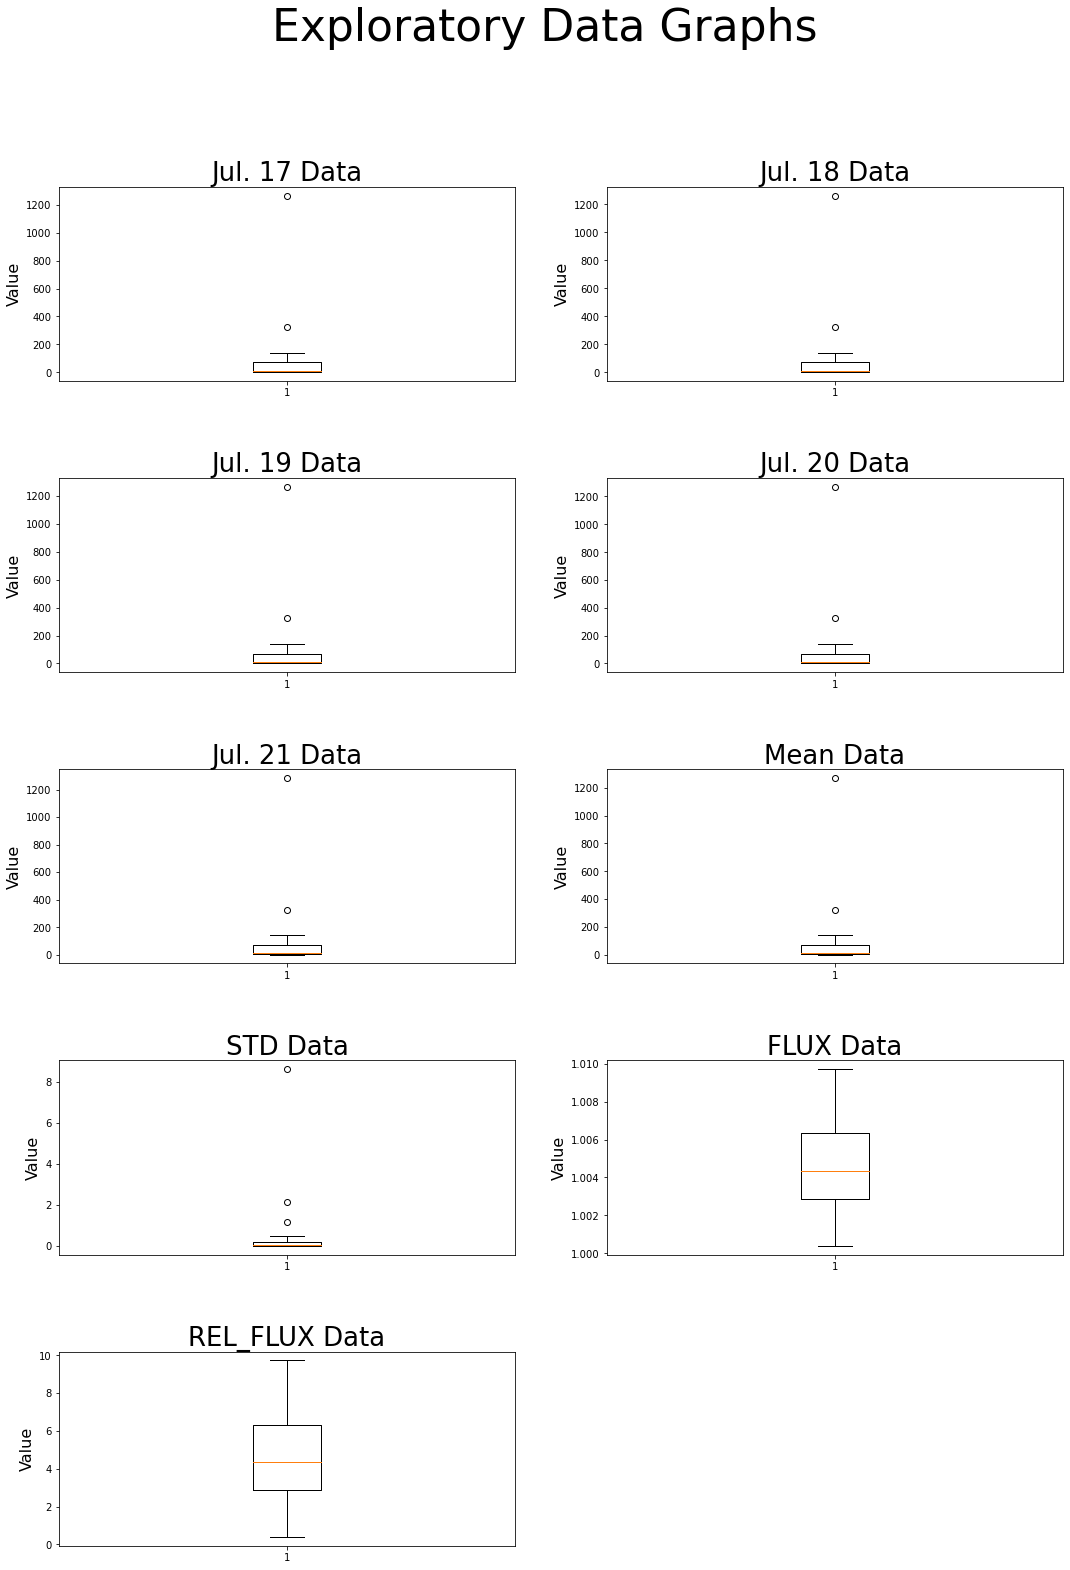

In [61]:
# For a graphical exmaination I shall present the following two collections of plots. The first is a collection of boxplots, 
# and the second shall be histograms. It can be seen in these first graphs that there are some datapoints that lie far 
# outside of the range occupied by the rest, but this isn't actually a concern. In the case of the graphs pertaining to any
# individual day or the the mean or the standard deviation these differences are largely nominal and for most values have to do 
# with scaling. The exchange rate of the Won is naturally going to look like an outlier compared to other exchange rates without
# there being anything wrong. Where the graphs get more interesting is when one examines the graphs for 'FLUX' and 'REL_FLUX' as
# these are scaled to be more directly comparable and still there are some datapoints that lie far out of range. However, they 
# are correct and more reflect economic differences than any issue with the data.

column_list = web_df.columns[2:]


fig, axes = plt.subplots(5,2, figsize = (18, 25))
fig.delaxes(axes[4,1])
counter = 0
for i in range(5):
    for n in range(2):
        axes[i,n].boxplot(web_df[column_list[counter]])
        axes[i,n].set_title(f"{column_list[counter]} Data", fontsize = 26)
        axes[i,n].set_ylabel("Value", fontsize = 16)
        counter +=1
        if counter == 9:
            break
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Exploratory Data Graphs", fontsize = 44)
plt.show()   

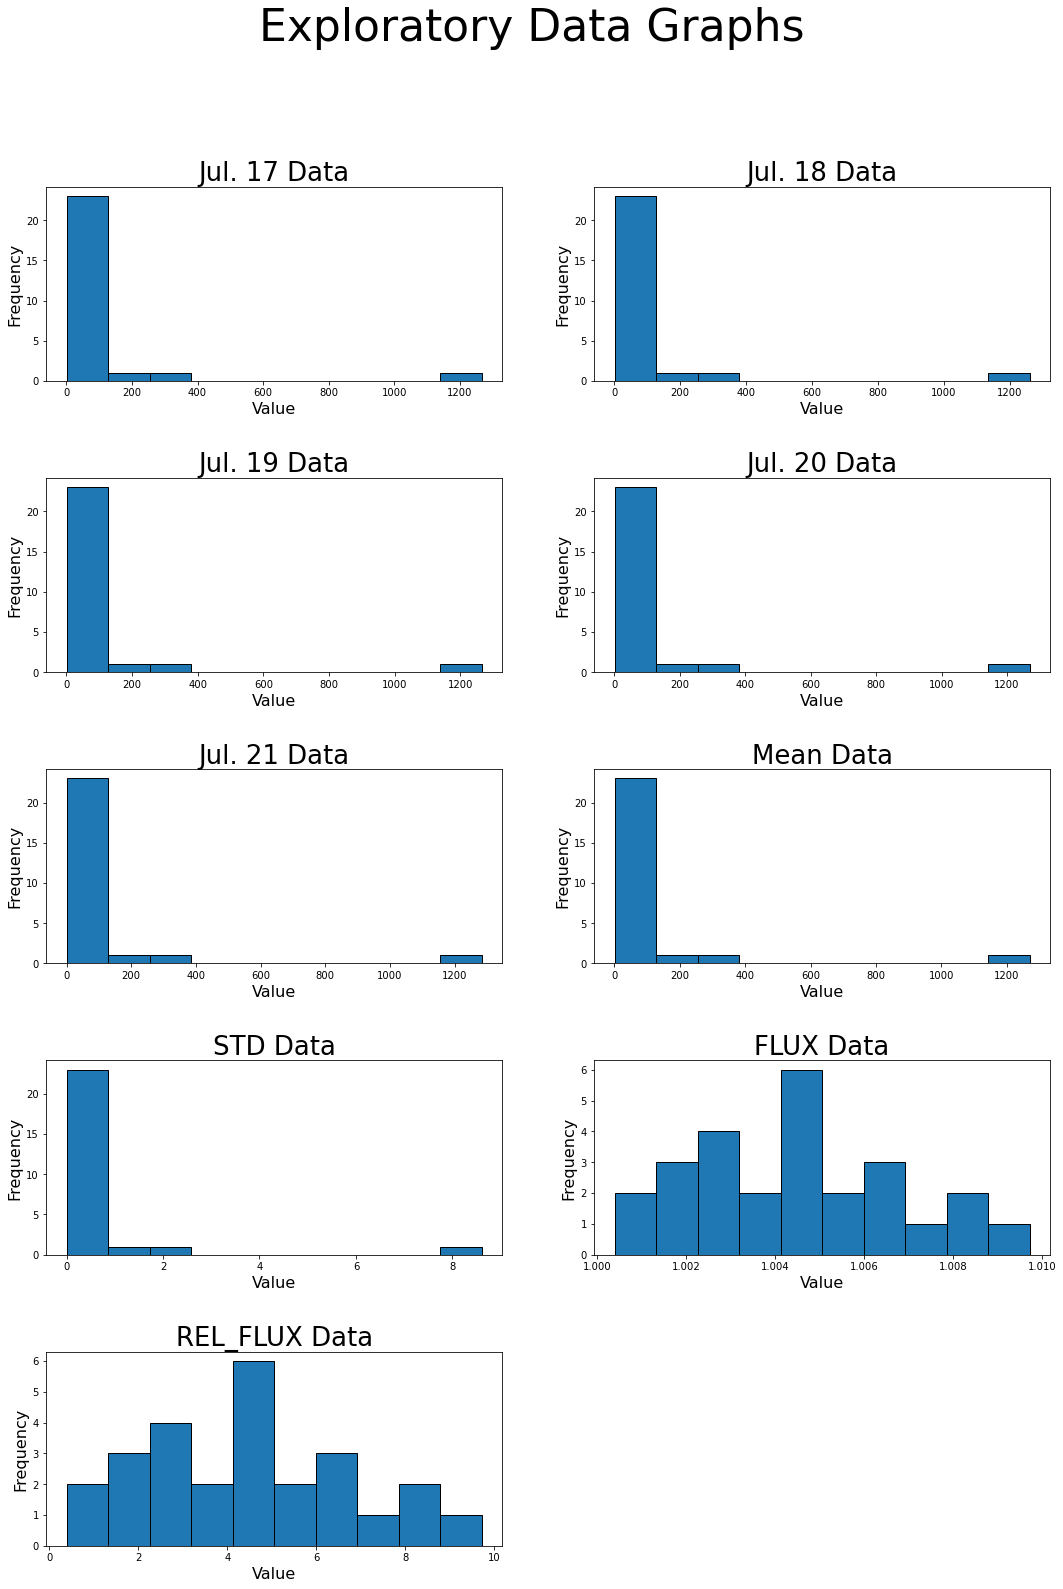

In [62]:
# Here, much the same is true as was the case for my previous graphs, though it may be easier to see the magnitudes of the 
# differences in question. Still, for the "FLUX" and "REL_FLUX" the outliers remain, and as before the data is still correct,
# it is merely reflecting economic situations and differences.

column_list =  web_df.columns[2:]


fig, axes = plt.subplots(5,2, figsize = (18, 25))
fig.delaxes(axes[4,1])
counter = 0
for i in range(5):
    for n in range(2):
        axes[i,n].hist(web_df[column_list[counter]], edgecolor = 'black')
        axes[i,n].set_title(f"{column_list[counter]} Data", fontsize = 26)
        axes[i,n].set_xlabel("Value", fontsize = 16)
        axes[i,n].set_ylabel("Frequency", fontsize = 16)
        counter +=1
        if counter == 9:
            break
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Exploratory Data Graphs", fontsize = 44)
plt.show()   

In [63]:
# For the sixth of my required transformations I shall arrange my dataframe according to which countries have the greatest
# relative flux ("REL_FLUX"). This also has the pleasing side-effect of arranging the dataframe according to the countries with
# the greatest flux ("FLUX"), but the relative flux provides an easier to digest version of the same information. This may be 
# useful for my final project depending on if I decide to plot any data on strong economic movements in any regions. Perhaps
# not unexpectedly given the country's recent economic woes, Venezuala leads the pack in terms of instability of its currency's 
# exchange rate with the USD.

web_df_sorted_flux = web_df.sort_values('REL_FLUX', ascending = False)
web_df_sorted_flux

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21,Mean,STD,FLUX,REL_FLUX
11,*NEW ZEALAND,DOLLAR,0.6335,0.6292,0.6244,0.6224,0.6178,0.6255,0.006078,1.009718,9.717804
21,*UNITED KINGDOM,POUND,1.3078,1.3054,1.2898,1.2849,1.2854,1.2947,0.011098,1.008572,8.571605
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500,139.9520,1.177994,1.008417,8.417129
17,SWEDEN,KRONA,10.2514,10.2177,10.2759,10.3482,10.3944,10.2975,0.072319,1.007023,7.022926
15,SOUTH KOREA,WON,1267.0200,1260.8700,1265.7600,1269.2600,1283.7100,1269.3240,8.608741,1.006782,6.782147
20,THAILAND,BAHT,34.5700,34.0600,34.0600,34.2300,34.4400,34.2720,0.228408,1.006665,6.664552
16,SRI LANKA,RUPEE,320.8600,322.0000,323.0000,324.0000,326.5000,323.2720,2.148236,1.006645,6.645291
22,VENEZUELA,BOLIVAR,28.5384,28.5978,28.7403,28.8067,28.9181,28.7203,0.154178,1.005368,5.368265
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737,0.6783,0.003585,1.005285,5.285226
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001,6.6630,0.031240,1.004689,4.688604


In [64]:
# For my seventh of my five required operations I will create a heirarchical index based on the names of the currencies. I do 
# not know for sure if I will use this form of my data in my final project, but it is nice to see how the data clusters by 
# currency.


web_df_heir = web_df_sorted_flux.set_index(['CURRENCY', 'COUNTRY']).sort_index()
web_df_heir

Jul. 17    Jul. 18    Jul. 19    Jul. 20  \
CURRENCY  COUNTRY                                                       
BAHT      THAILAND           34.5700    34.0600    34.0600    34.2300   
BOLIVAR   VENEZUELA          28.5384    28.5978    28.7403    28.8067   
DOLLAR    *AUSTRALIA          0.6821     0.6817     0.6763     0.6778   
          *NEW ZEALAND        0.6335     0.6292     0.6244     0.6224   
          CANADA              1.3173     1.3175     1.3158     1.3182   
          HONG KONG           7.8144     7.8126     7.8085     7.8128   
          SINGAPORE           1.3217     1.3221     1.3256     1.3273   
          TAIWAN             31.0200    30.9600    31.1300    31.0900   
EURO      *EMU MEMBERS        1.1236     1.1223     1.1195     1.1135   
FRANC     SWITZERLAND         0.8602     0.8582     0.8598     0.8671   
JAN06=100 1) BROAD          117.6944   117.5985   117.9361   118.1357   
          2) AFE            111.8242   111.8841   112.2108   112.6787   
          3) EME            125.3652   125.1107   125.4643   125.3970   
KRONA     SWEDEN             10.2514    10.2177    10.2759    10.3482   
KRONE     DENMARK             6.6310     6.6373     6.6557     6.6911   
          NORWAY             10.0259    10.0563    10.0533    10.0898   
PESO      MEXICO             16.8047    16.7423    16.7590    16.8359   
POUND     *UNITED KINGDOM     1.3078     1.3054     1.2898     1.2849   
RAND      SOUTH AFRICA       18.0349    17.8501    17.9255    17.9679   
REAL      BRAZIL              4.8249     4.7985     4.8022     4.8074   
RINGGIT   MALAYSIA            4.5353     4.5374     4.5374     4.5400   
RUPEE     INDIA              82.0300    82.0300    82.0900    81.9900   
          SRI LANKA         320.8600   322.0000   323.0000   324.0000   
WON       SOUTH KOREA      1267.0200  1260.8700  1265.7600  1269.2600   
YEN       JAPAN             138.9200   138.9400   139.7600   140.3900   
YUAN      CHINA, P.R.         7.1711     7.1786     7.2260     7.1761   

                             Jul. 21       Mean       STD      FLUX  REL_FLUX  
CURRENCY  COUNTRY                                                              
BAHT      THAILAND           34.4400    34.2720  0.228408  1.006665  6.664552  
BOLIVAR   VENEZUELA          28.9181    28.7203  0.154178  1.005368  5.368265  
DOLLAR    *AUSTRALIA          0.6737     0.6783  0.003585  1.005285  5.285226  
          *NEW ZEALAND        0.6178     0.6255  0.006078  1.009718  9.717804  
          CANADA              1.3217     1.3181  0.002194  1.001665  1.664753  
          HONG KONG           7.8169     7.8130  0.003066  1.000392  0.392478  
          SINGAPORE           1.3306     1.3255  0.003717  1.002804  2.803911  
          TAIWAN             31.2500    31.0900  0.110680  1.003560  3.559978  
EURO      *EMU MEMBERS        1.1120     1.1182  0.005201  1.004651  4.650933  
FRANC     SWITZERLAND         0.8658     0.8622  0.003960  1.004593  4.592960  
JAN06=100 1) BROAD          118.4822   117.9694  0.355289  1.003012  3.011702  
          2) AFE            112.9578   112.3111  0.495684  1.004413  4.413493  
          3) EME            125.8165   125.4307  0.253868  1.002024  2.023973  
KRONA     SWEDEN             10.3944    10.2975  0.072319  1.007023  7.022926  
KRONE     DENMARK             6.7001     6.6630  0.031240  1.004689  4.688604  
          NORWAY             10.0851    10.0621  0.026066  1.002591  2.590543  
PESO      MEXICO             16.9228    16.8129  0.071700  1.004265  4.264609  
POUND     *UNITED KINGDOM     1.2854     1.2947  0.011098  1.008572  8.571605  
RAND      SOUTH AFRICA       17.9457    17.9448  0.067069  1.003738  3.737518  
REAL      BRAZIL              4.7680     4.8002  0.020650  1.004302  4.301866  
RINGGIT   MALAYSIA            4.5600     4.5420  0.010188  1.002243  2.243137  
RUPEE     INDIA              81.9900    82.0260  0.040988  1.000500  0.499693  
          SRI LANKA         326.5000   323.2720  2.148236  1.006

In [65]:
# My final dataframe presented for inspection. I have also made two other dataframes (web_df_sorted_flux and web_df_heir), but I
# am unsure which of my dataframes will work best in my final dataset so I am presenting the one that is not sorted towards any
# particular goal as its flexibility may offer me the best options when the time comes.

web_df

,COUNTRY,CURRENCY,Jul. 17,Jul. 18,Jul. 19,Jul. 20,Jul. 21,Mean,STD,FLUX,REL_FLUX
0,*AUSTRALIA,DOLLAR,0.6821,0.6817,0.6763,0.6778,0.6737,0.6783,0.003585,1.005285,5.285226
1,BRAZIL,REAL,4.8249,4.7985,4.8022,4.8074,4.7680,4.8002,0.020650,1.004302,4.301866
2,CANADA,DOLLAR,1.3173,1.3175,1.3158,1.3182,1.3217,1.3181,0.002194,1.001665,1.664753
3,"CHINA, P.R.",YUAN,7.1711,7.1786,7.2260,7.1761,7.1861,7.1876,0.022149,1.003082,3.081553
4,DENMARK,KRONE,6.6310,6.6373,6.6557,6.6911,6.7001,6.6630,0.031240,1.004689,4.688604
5,*EMU MEMBERS,EURO,1.1236,1.1223,1.1195,1.1135,1.1120,1.1182,0.005201,1.004651,4.650933
6,HONG KONG,DOLLAR,7.8144,7.8126,7.8085,7.8128,7.8169,7.8130,0.003066,1.000392,0.392478
7,INDIA,RUPEE,82.0300,82.0300,82.0900,81.9900,81.9900,82.0260,0.040988,1.000500,0.499693
8,JAPAN,YEN,138.9200,138.9400,139.7600,140.3900,141.7500,139.9520,1.177994,1.008417,8.417129
9,MALAYSIA,RINGGIT,4.5353,4.5374,4.5374,4.5400,4.5600,4.5420,0.010188,1.002243,2.243137


# Ethical Hazards:

The data I have selected, as well as the data as I have processed it, is presently free from ethical flaws. The data has nothing to do with any individuals or groups of people, though since it is data about exchange rates the data does have something to do with abstractions of people on the level of countries, though exchange rates in and of themselves are morally neutral and simply represent how much of 'x' must be traded for how much of 'y' with no value judgements being made or imputed whatsoever. The derived values of 'FLUX' and 'REL_FLUX' are similarly without regard to persons, and shows only how stable a given exchange rate has been over the period of time in question. Just as cryptocurrency prices fluctuating makes no explicit or implied moral judgement, so to do fluctuating exchange rates offer nor moral praise or condemnation. Furthermore, since this is data exploration and not actually the final stage of my report wherein I present any claims I am making, there is no hazard as to my work misleading anybody as this is only preliminary and I am not yet making any claims that could mislead. In the final product, should I make any claims, then there may be ethical hazards within those. At this point I'm just trying to find interesting data and interesting relationships in that data and the information itself is public information and completely impersonal. Therefore, my work as it stands now is free of ethical hazards.  